Inventario de tiendas minoristas y previsión de la demanda.

- **Fuente**: Kaggle
- **Tamaño**: Número de registros en el dataset 76000
- **Variables**:
- Fecha: Fecha del registro.
- ID de la tienda: Identificador único de la tienda.
- ID de producto: Identificador único del producto.
- Categoría: Categoría de producto.
- Región: Región geográfica de la tienda.
- Nivel de Inventario: Unidades disponibles en stock.
- Unidades vendidas: Unidades vendidas ese día.
- Unidades Pedidas: Unidades Pedidas para Reposición.
- Precio: Precio del producto.
- Descuento: Descuento aplicado, si lo hubiera.
- Condición Meteorológica: El tiempo del día del registro.
- Promoción: si hubo promoción, en caso contrario.10
- Precio de la competencia: Precio de un producto similar de un competidor.
- Estacionalidad: Estación (por ejemplo, invierno, primavera).
- Epidemia: si ocurrió una epidemia, de lo contrario.10
- Demanda: Demanda diaria estimada del producto

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
df = pd.read_csv("/content/sales_data.csv")
# Mostrar el número de registros
print(f"Número de registros en el dataset: {df.shape[0]}")

Número de registros en el dataset: 76000


#1- Análisis Exploratorio de Datos (EDA) Inicial:

In [3]:
# Imprime los tipos de datos del df
print("Tipos de datos del DataFrame:")
display(df.dtypes)

Tipos de datos del DataFrame:


,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Price,float64
Discount,int64


In [4]:
# Imprime las primeras columnas del df
print("Primeras 5 filas del DataFrame:")
display(df.head())

Primeras 5 filas del DataFrame:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [5]:
# Imprime valores outliers
# df.shape[0] número de filas y df.shape[1] número de columnas
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
print("Resumen estadístico de las características numéricas:")
# df.describe() para calcular estadísticas descriptivas com la media, desviación estándar, valores mínimo y máximo, y percentiles para cada columna numérica.
display(df.describe())

El conjunto de datos tiene 76000 filas y 16 columnas.

Resumen estadístico de las características numéricas:


,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


Análisis Estadístico Descriptivo

In [6]:
# Imprime la distribución de las variables categóricas
print("Distribucion de variables:")
display(df.describe(include=["object", "category"]))

Distribucion de variables:


,Date,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
count,76000,76000,76000,76000,76000,76000,76000
unique,760,5,20,5,4,4,4
top,2024-01-30,S001,P0001,Groceries,North,Cloudy,Winter
freq,100,15200,3800,30400,30400,24360,21000


<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


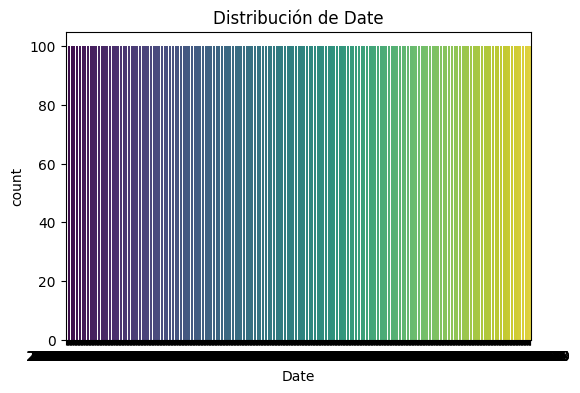

<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


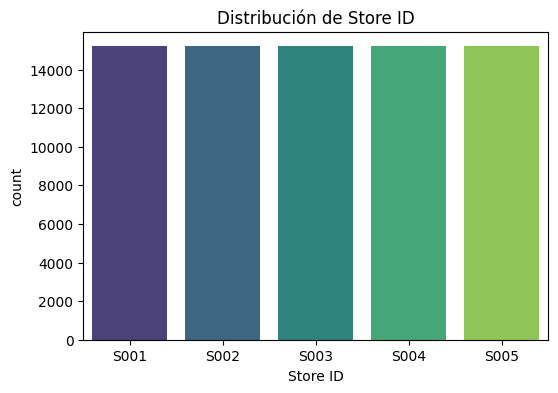

<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


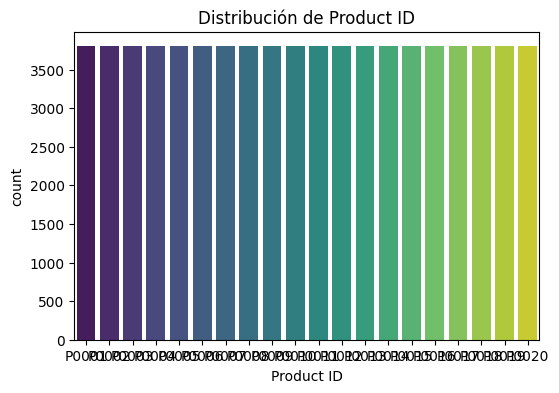

<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


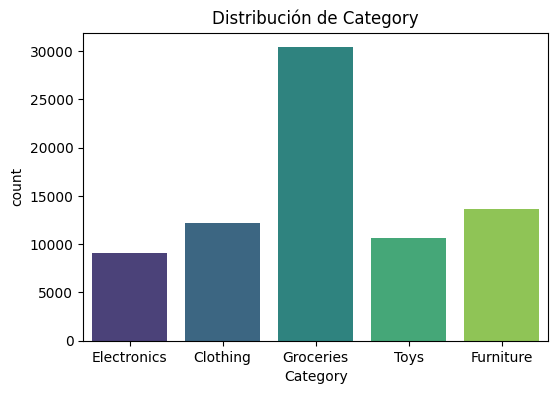

<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


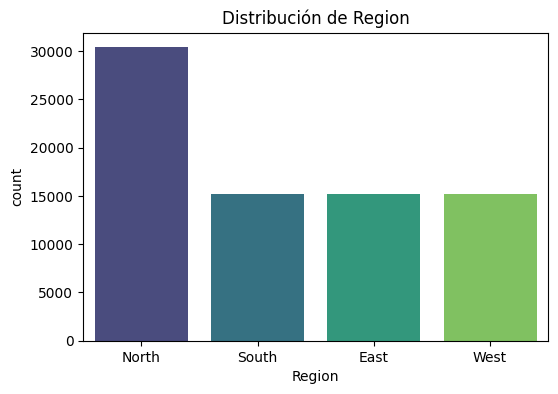

<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


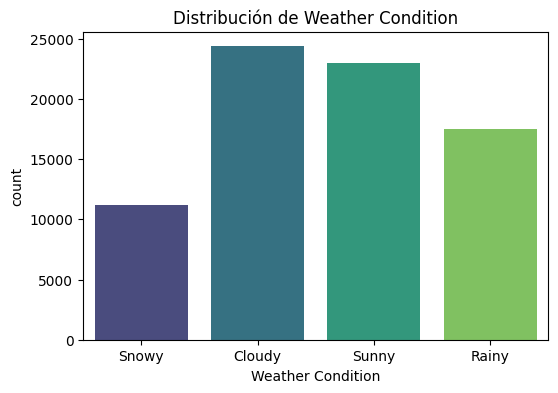

<ipython-input-9-597e6baacc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


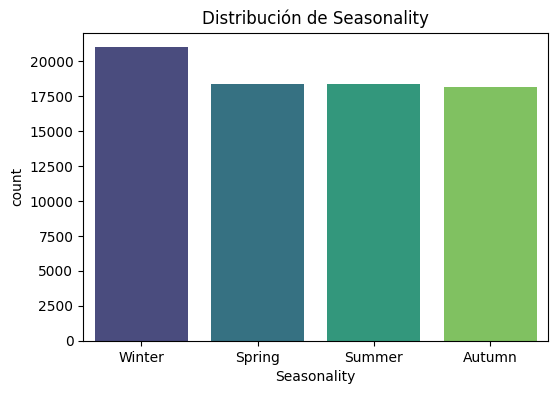

In [9]:
# Conteo de valores categóricos
categorical_cols = ["Date", "Store ID", "Product ID",	"Category",	"Region",	"Weather Condition",	"Seasonality"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribución de {col}")
    plt.show()

Visualizaciones

<Figure size 1000x600 with 0 Axes>

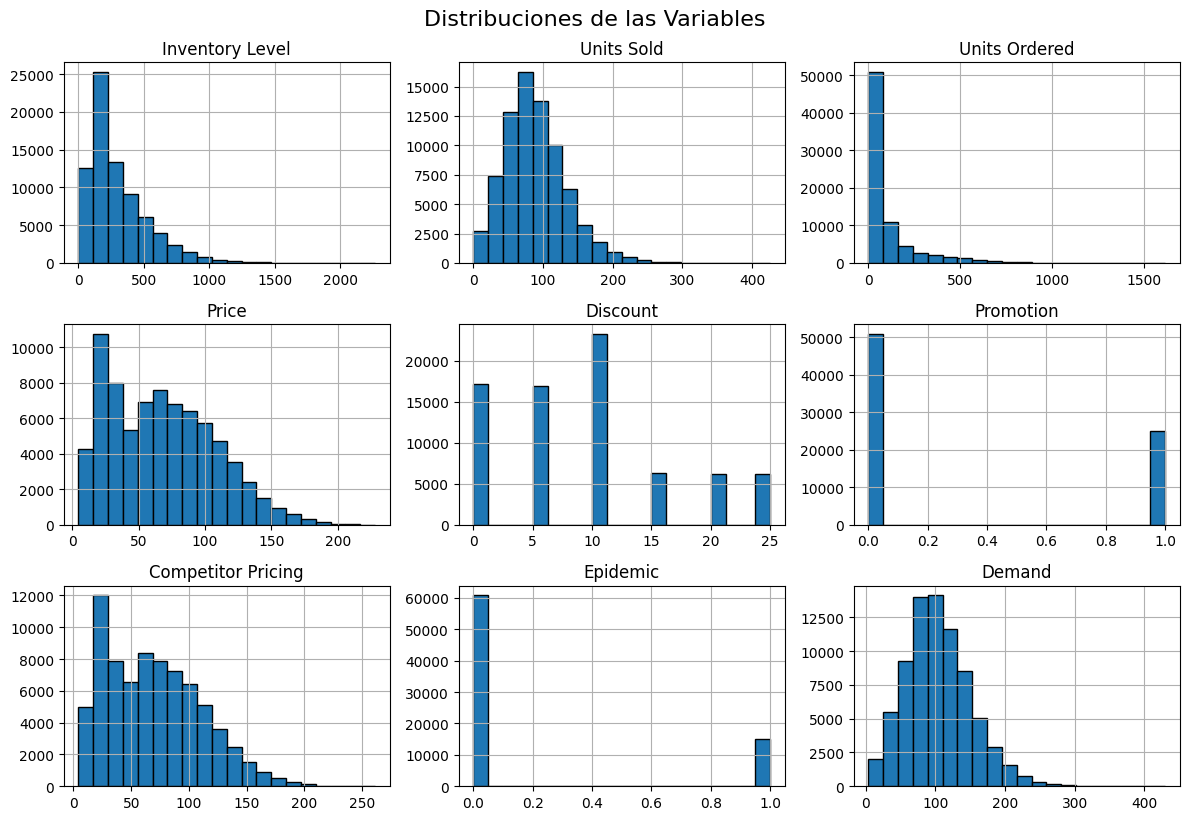

In [10]:
# Visualizar las distribuciones de las características numéricas principales del conjunto de datos.
plt.figure(figsize=(10, 6))

# Generar histogramas para cada columna numérica del DataFrame:
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
# Ajustar automáticamente los espacios entre subgráficos para evitar solapamientos.
plt.tight_layout()
# Agregar un título general a los histogramas.
plt.suptitle("Distribuciones de las Variables", fontsize=16, y=1.02)
plt.show()

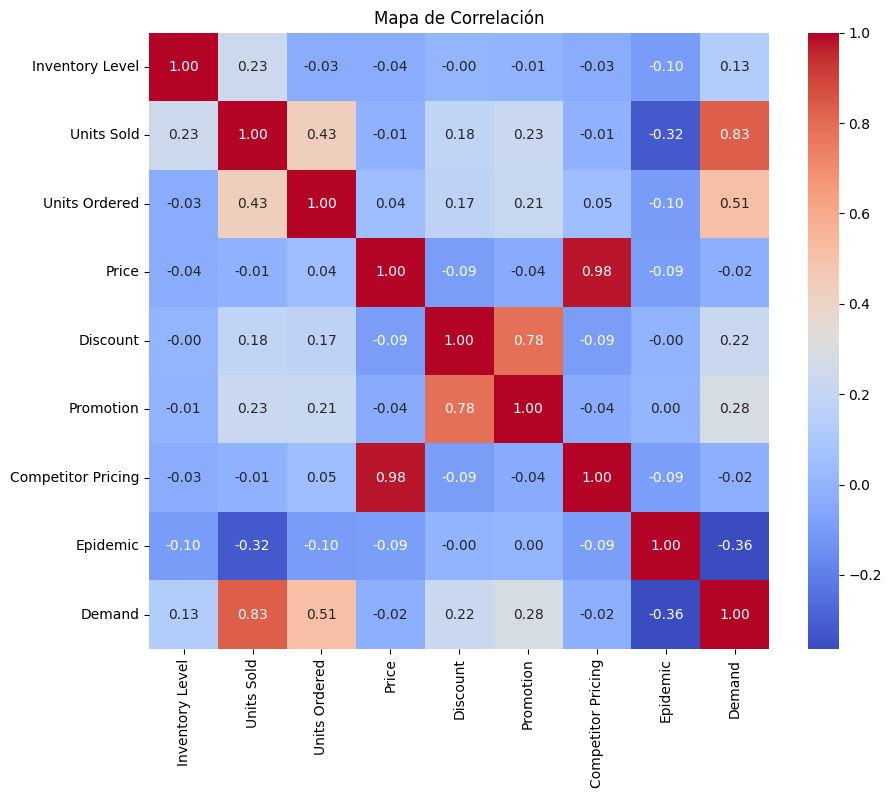

In [11]:
# Seleccionar solo columnas numéricas relevantes
numeric_cols = ["Inventory Level", "Units Sold", "Units Ordered", "Price",
                "Discount", "Promotion", "Competitor Pricing",
                "Epidemic", "Demand"]

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Visualizar el mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

Identificación de Valores Nulos y Outliers

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64


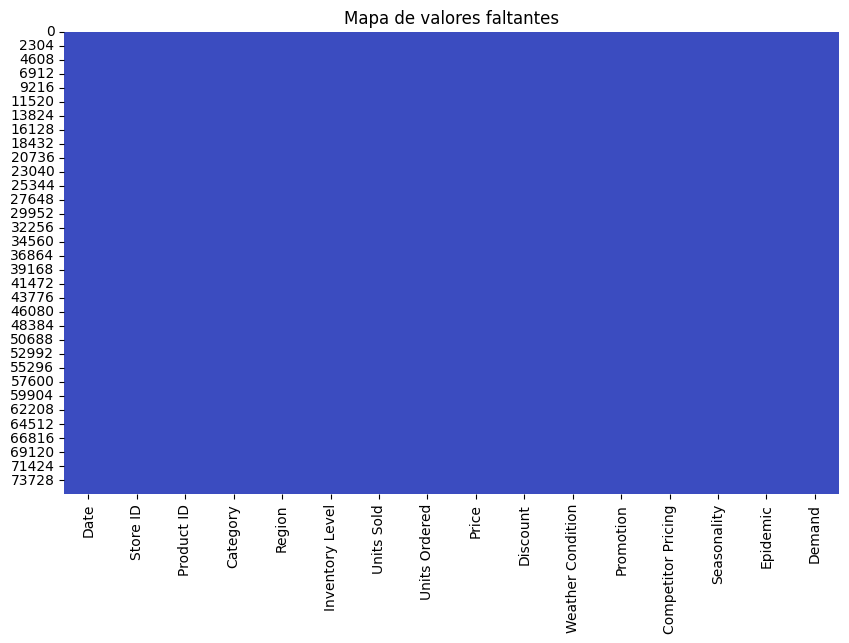

In [12]:
# Conteo de valores nulos en cada columna
print(df.isnull().sum())
# Visualización con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

In [13]:
# Seleccionar solo las columnas numéricas para el cálculo de cuantiles
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Identificar outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variable:")
print(outliers)

Número de outliers por variable:
Inventory Level        2759
Units Sold             1411
Units Ordered          7524
Price                    70
Discount              12413
Promotion                 0
Competitor Pricing      185
Epidemic              15200
Demand                  986
dtype: int64


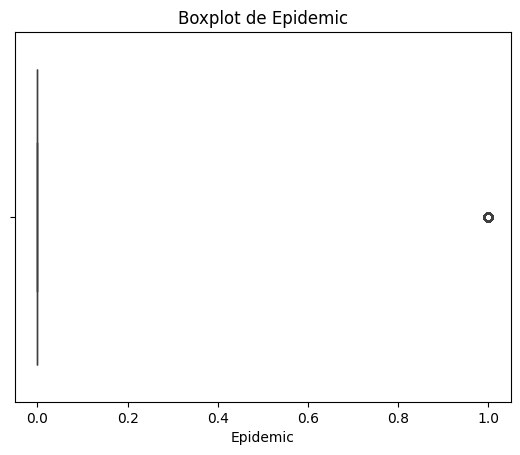

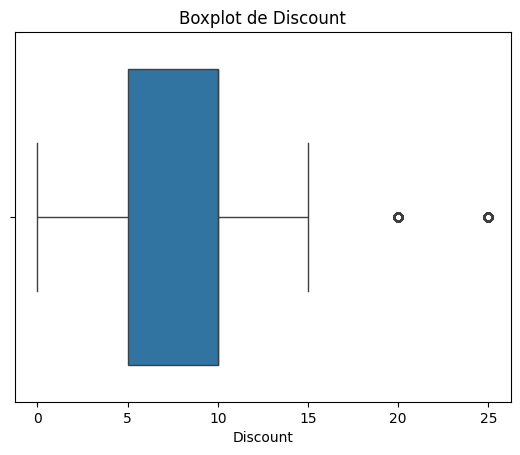

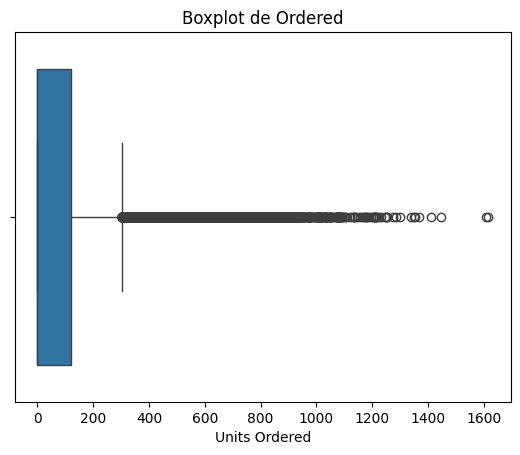

In [19]:
# Verificacion del impacto de los valores outliers a traves de un boxplot
sns.boxplot(x=df["Epidemic"])
plt.title("Boxplot de Epidemic")
plt.show()
sns.boxplot(x=df["Discount"])
plt.title("Boxplot de Discount")
plt.show()
sns.boxplot(x=df["Units Ordered"])
plt.title("Boxplot de Ordered")
plt.show()


In [20]:
# Esto transformará los valores en 0 (sin epidemia) y 1 (epidemia activa), facilitando su uso en la clasificación
df["Epidemic"] = df["Epidemic"].apply(lambda x: 1 if x > 0 else 0)

In [23]:
# Reducir la influencia de los valores extremos sin eliminar información clave.
# Aplicar transformación logarítmica
df["Discount"] = np.log1p(df["Discount"])

In [24]:
# Winsorización limitará los valores extremos sin eliminarlos, lo que mantendrá la estructura del dataset,
# sin permitir que los outliers distorsionen el modelo de clasificación
from scipy.stats.mstats import winsorize

# Aplicar Winsorización al percentil 95
df["Units Ordered"] = winsorize(df["Units Ordered"], limits=[0, 0.05])

In [26]:
# Aplicar el método IQR (Interquartile Range) para eliminar valores extremadamente altos
Q1 = df["Units Sold"].quantile(0.25)
Q3 = df["Units Sold"].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df["Units Sold"] >= Q1 - 1.5 * IQR) & (df["Units Sold"] <= Q3 + 1.5 * IQR)]

Q1 = df["Inventory Level"].quantile(0.25)
Q3 = df["Inventory Level"].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df["Inventory Level"] >= Q1 - 1.5 * IQR) & (df["Inventory Level"] <= Q3 + 1.5 * IQR)]

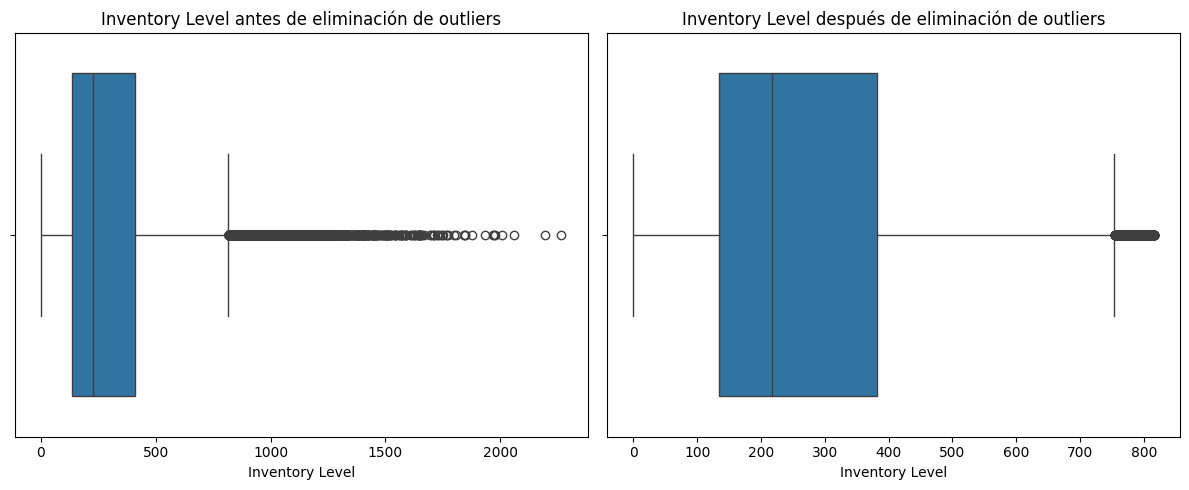

In [29]:
# Inventory Level antes y después
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Inventory Level"])
plt.title("Inventory Level antes de eliminación de outliers")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered["Inventory Level"])
plt.title("Inventory Level después de eliminación de outliers")

plt.tight_layout()
plt.show()

#2- Resumen de Hallazgos:
#Características principales

**Influencia de promociones y descuentos en la demanda**:

- Discount y Promotion tienen una fuerte relación con Units Sold, lo que sugiere que los descuentos impulsan significativamente las ventas.

- Competitor Pricing también muestra correlación moderada, indicando que los precios de la competencia afectan directamente la demanda.

**Estacionalidad y variabilidad del inventario**:

- Seasonality impacta la demanda de productos, especialmente en categorías como electrónica y ropa.

- Inventory Level y Units Ordered reflejan ajustes en el stock según períodos de alta demanda.

#Desafíos en el análisis

Presencia de valores extremos en múltiples variables:

- Units Ordered, Discount, Inventory Level y Demand contienen valores atípicos que podrían distorsionar la clasificación.

- Se han aplicado Winsorización, Transformación Logarítmica y IQR para estabilizar la distribución de los datos.

Codificación adecuada de variables categóricas:

- Category, Seasonality y Weather Condition requieren One-Hot Encoding para ser utilizadas en el modelo de clasificación.

# 3- Diagnóstico y Selección de Problema:
Elección de la problemática: Clasificación ya que el objetivo será clasificar los productos en categorías de demanda (baja, media, alta) en función de factores comerciales y externos.
#Justificación de la problemática
**Impacto directo de factores comerciales en la demanda**:

- Variables como Discount, Promotion y Competitor Pricing tienen fuerte correlación con la cantidad de productos vendidos.

- Clasificar productos según estos factores permite entender qué estrategias impulsan las ventas en diferentes categorías.

- Con un modelo de clasificación, se pueden anticipar tendencias y ajustar inventarios con mayor precisión.